# Avocado Prices

### numerical vars
'Total Volume' - number of avocados sold


'4046' - total sales vol of s/m Hass avocados

'4225' - total sales vol of l Hass avocados

'4770' - total sales vol of xl Hass avocados

'Total Bags' - total bags sold

'Small Bags' - total small bags sold

'Large Bags' - total large bags sold

'XLarge Bags' - total xlarge bags sold



### categorical vars
'region' - where the avocado sales were made

'type' - type of avocados sold

### etc
'#' - index

'date' - date of price observation


### target
'AveragePrice' - average price of a single avocado

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%autosave 0

## preliminary data exploration

In [5]:
avo = pd.read_csv('./DATA/avocado.csv')
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.info()

# no missing data
# data, type, year, and region are all categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
avo['type'].value_counts()

# check types

conventional    9126
organic         9123
Name: type, dtype: int64

In [7]:
avo['region'].value_counts()

# equal data from each of these regions

West                   338
California             338
Philadelphia           338
BaltimoreWashington    338
Houston                338
NewOrleansMobile       338
GreatLakes             338
RichmondNorfolk        338
Tampa                  338
Syracuse               338
Portland               338
SanDiego               338
BuffaloRochester       338
Spokane                338
GrandRapids            338
NewYork                338
MiamiFtLauderdale      338
Plains                 338
Boston                 338
PhoenixTucson          338
TotalUS                338
Charlotte              338
Louisville             338
LasVegas               338
Jacksonville           338
Roanoke                338
Sacramento             338
Indianapolis           338
SanFrancisco           338
Midsouth               338
Orlando                338
Columbus               338
StLouis                338
Detroit                338
LosAngeles             338
HartfordSpringfield    338
Nashville              338
B

In [8]:
avo.describe()

# average price is 1.41
# small/med & large have about the same mean sales volume
# large bags sell more than small, and a lot more than XL
# people seem to have bought most avocados in 2016

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [19]:
# remove useless unnamed feature

In [20]:
avo.head()

,Date,AveragePrice,Total Volume,SMSalesVol,LSalesVol,XLSalesVol,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## feature engineering + data exploration

In [21]:
avo['Date'] = pd.to_datetime(avo['Date'])
df['Month'] = avo['Date'].apply(lambda x:x.month)
df['Day'] = avo['Date'].apply(lambda x:x.day)

# convert date to better format
# grab month and day

Text(0.5, 1.0, 'Average Price')

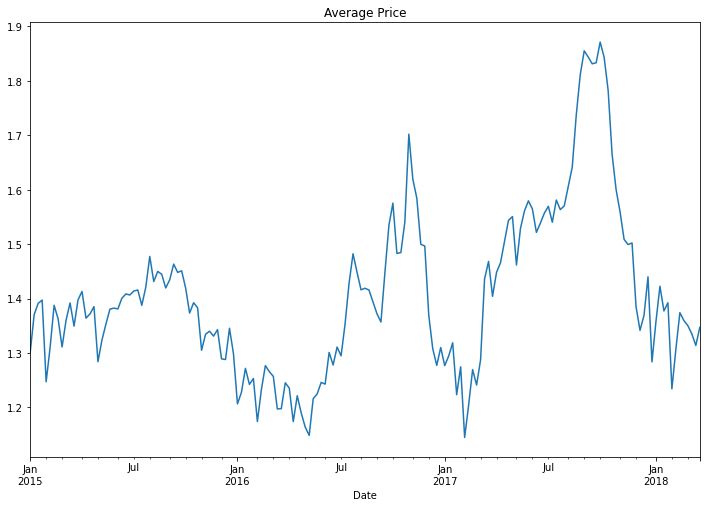

In [22]:
byDate = avo.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()

plt.title('Average Price')

# groups data by date (x axis), plots avg price over dates

<AxesSubplot:>

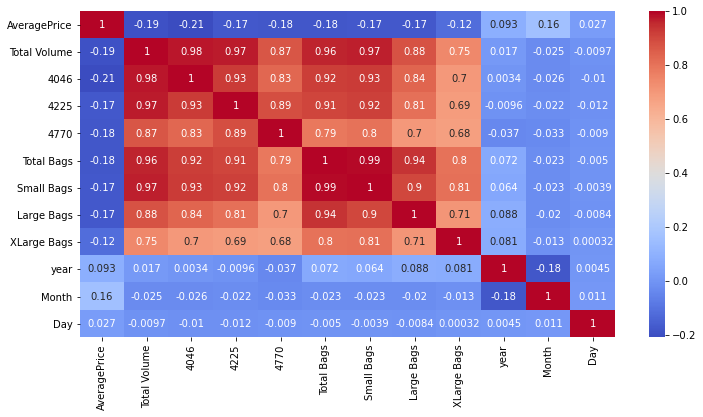

In [25]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# see relationships between features
# most numerical features are not correlated with average price

In [27]:
# feature engineer the categorical vals

avo['region'].nunique() # 54
avo['type'].nunique() # 2

avofinal = pd.get_dummies(df.drop(['region', 'Date'], axis=1), drop_first=True)

# drop region and date

In [29]:
avofinal.rename(columns= {'4046':'SMSalesVol', '4225':'LSalesVol', '4770':'XLSalesVol'}, inplace=True)

avofinal.head()

# a bunch of data from all around the US
# type_organic is one-hot encoding - is it organic or conventional?

,AveragePrice,Total Volume,SMSalesVol,LSalesVol,XLSalesVol,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


## build the model

In [30]:
X = avofinal.iloc[:,1:14] # grab all but the index
y = avofinal['AveragePrice']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

In [33]:
from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

# low RMSE

RMSE: 0.3018079323899568


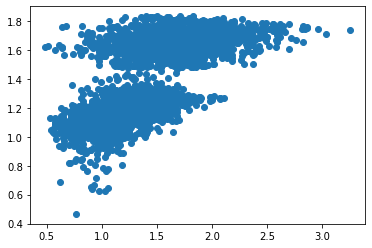

In [34]:
plt.scatter(x=y_test, y=pred)

# double check our predictions 
# not a perfect line (stratified - doesn't tend to predict anywhere around 1.4)
# let's try another model

Text(0, 0.5, 'Predicted Y')

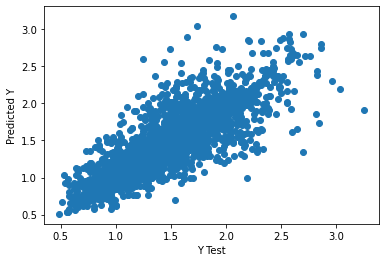

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)

plt.scatter(x=y_test, y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# much better

In [36]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

# also lower than the linreg RMSE
# let's try one last model

RMSE: 0.21297803604037774


In [37]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
pred = forest.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

# lowest RMSE

RMSE: 0.14642553700660013


/Users/kenzie/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

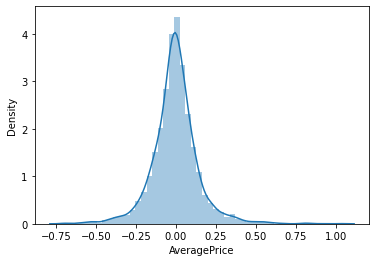

In [38]:
sns.distplot((y_test-pred),bins=50)

# residuals between test + predictions are normally distributed 

,Y Test,Pred
8604,0.82,0.9347
2608,0.97,0.9980
14581,1.44,1.3864
4254,0.97,0.9066
16588,1.45,1.4462


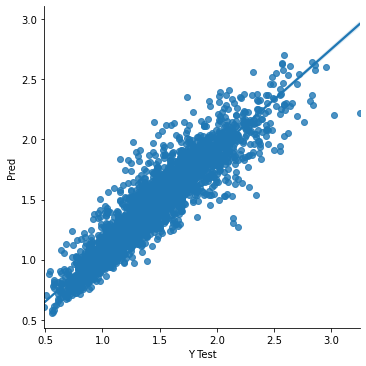

In [39]:
data = pd.DataFrame({'Y Test':y_test, 'Pred':pred}, columns=['Y Test', 'Pred'])

sns.lmplot(x='Y Test', y='Pred', data=data, palette='rainbow')

data.head()

# model fits the data well